<h1>Assignments for "Data Exploration - Univariate Analysis"</h1>

In this assignment, you will continue to study the data of the US Education System (dataset). In this dataset, there is a lot of data on an annual basis. You can reach the explanations of this data from Kaggle again.

To complete this assignment, submit the Github link of the Jupyter notebook file containing solutions to the questions below. You can talk to your mentor on your head or ask Slack at office time.

First of all, apply the most appropriate one of the techniques for completing the missing values in your previous lesson. In order to answer the following questions, you must overcome the missing data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import zscore
from scipy.stats.mstats import winsorize

states = pd.read_csv("states_all.csv")
states.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [2]:
#ilk 3 sütunumda boş veri olmadığı için geri kalan sütunları dolduruyorum.
for i in states.columns[3:]:
    for year in states['YEAR'].unique():
        states[i].fillna(states[states['YEAR'] == year][i].mean(), inplace=True)

In [6]:
states.isnull().sum()

PRIMARY_KEY                     0
STATE                           0
YEAR                            0
ENROLL                          0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
GRADES_PK_G                     0
GRADES_KG_G                     0
GRADES_4_G                      0
GRADES_8_G                      0
GRADES_12_G                     0
GRADES_1_8_G                    0
GRADES_9_12_G                   0
GRADES_ALL_G                    0
AVG_MATH_4_SCORE                0
AVG_MATH_8_SCORE                0
AVG_READING_4_SCORE             0
AVG_READING_8_SCORE             0
dtype: int64

<p>Now we dont have any missing values.</p>

<b>(1)</b> Interpret the data by making univariate analysis and indicate the points you consider important.

In [7]:
states.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1715.000000,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,...,1715.000000,1715.000000,1715.000000,1.715000e+03,1.715000e+03,1.715000e+03,1715.000000,1715.000000,1715.000000,1715.000000
mean,2002.075219,8.844779e+05,7.940014e+06,6.470043e+05,3.675878e+06,3.617132e+06,8.038215e+06,4.174329e+06,2.345868e+06,3.779261e+05,...,68990.235660,67779.692643,57899.964546,5.696683e+05,2.706907e+05,9.103738e+05,224.318598,270.522083,216.673632,261.166181
std,9.568621,9.024077e+05,1.032975e+07,1.010029e+06,4.874761e+06,4.806776e+06,1.052905e+07,5.525256e+06,2.950641e+06,4.591536e+05,...,78001.914197,76068.501470,65825.985118,5.211587e+05,2.617084e+05,1.030134e+06,9.963167,8.372126,5.012101,4.135655
min,1986.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,4577.000000,3371.000000,2572.000000,3.769800e+04,1.353000e+04,6.844900e+04,192.000000,231.000000,179.000000,236.000000
25%,1994.000000,4.646880e+05,2.992297e+06,2.602770e+05,1.618602e+06,1.162580e+06,3.004448e+06,1.570157e+06,8.996910e+05,1.624780e+05,...,20486.500000,20518.500000,17949.000000,3.158105e+05,1.457900e+05,2.800010e+05,218.418605,266.325581,215.372093,260.000000
50%,2002.000000,8.020543e+05,4.572764e+06,2.970296e+05,2.088314e+06,2.187420e+06,4.653591e+06,2.454000e+06,1.370149e+06,2.482348e+05,...,51999.000000,50447.000000,40774.000000,5.575071e+05,2.517678e+05,6.809780e+05,218.418605,266.325581,215.372093,260.000000
75%,2010.000000,8.694485e+05,8.165744e+06,6.732800e+05,3.837822e+06,3.484108e+06,8.220253e+06,4.133618e+06,2.442635e+06,4.079995e+05,...,77052.000000,76719.500000,68023.000000,5.575071e+05,2.528075e+05,1.002840e+06,231.000000,274.000000,217.000000,260.000000
max,2019.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,6.441557e+06,253.000000,301.000000,237.000000,280.000000


In [8]:
states.describe(include=['O'])

,PRIMARY_KEY,STATE
count,1715,1715
unique,1715,53
top,2002_NORTH_DAKOTA,CONNECTICUT
freq,1,33


<b>(2)</b> Consider a state (eg California) and plot the yearly change of total revenues and total spending. Do these two variables change by years? Do you have years of summit and bottom?

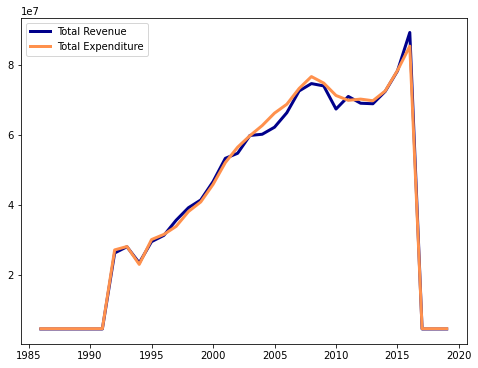

In [16]:
states1 = states.sort_values(by='YEAR')
California = states1[states1['STATE'] == 'CALIFORNIA']

plt.figure(figsize=(8, 6))

plt.plot(California['YEAR'], California['TOTAL_REVENUE'], c = "darkblue", lw = 3, label="Total Revenue")
plt.plot(California['YEAR'], California['TOTAL_EXPENDITURE'], c = "#FF914D", lw = 3, label='Total Expenditure')
plt.legend()

plt.show()

<p>Both total revenue and expenditure values have years of bottom at the same time, such as before 1991 and after 2017.</p>

<b>(3)</b> In which course are students more successful in your chosen state? Mathematics or reading?

In [19]:
California[["AVG_MATH_4_SCORE", "AVG_MATH_8_SCORE", "AVG_READING_4_SCORE", "AVG_READING_8_SCORE"]].describe()

,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,33.000000,33.000000,33.000000,33.000000
mean,221.582100,267.358703,212.558844,258.333333
std,6.762529,4.313154,4.937466,3.637192
min,208.000000,256.000000,197.000000,250.000000
25%,218.418605,266.325581,211.000000,259.000000
50%,218.418605,266.325581,215.372093,260.000000
75%,227.000000,267.000000,215.372093,260.000000
max,235.000000,277.000000,216.000000,263.000000


In [21]:
math_success = (California["AVG_MATH_4_SCORE"].sum() + California["AVG_MATH_8_SCORE"].sum())/2
read_success = (California["AVG_READING_4_SCORE"].sum() + California["AVG_READING_8_SCORE"].sum())/2

print("Math success is {} and reading success is {}".format(math_success, read_success))


Math success is 8067.523255813952 and reading success is 7769.720930232558


To find successful students in math or reading course, we need to calculate both fourth and eigthth graders average score for each course. Since we know the whole average score in different year we add them and multiply by 2. And final result show us that students are more successful in mathematics course at California.

<b>(4)</b> What is the distribution of mathematics and reading grades?

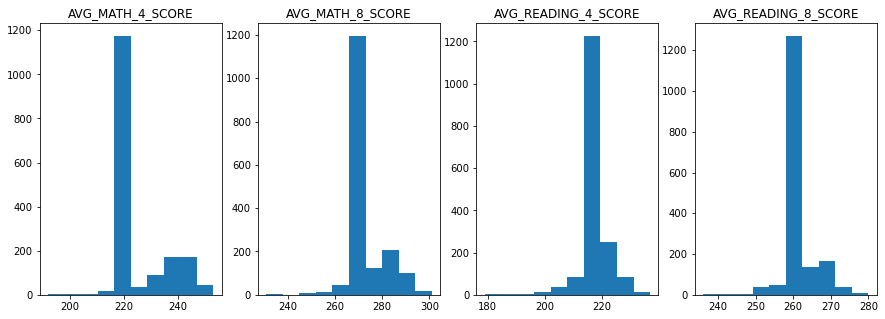

In [25]:
plt.figure(figsize=(15, 5))

plt.subplot(141)
plt.hist(states['AVG_MATH_4_SCORE'])
plt.title('AVG_MATH_4_SCORE')

plt.subplot(142)
plt.hist(states['AVG_MATH_8_SCORE'])
plt.title('AVG_MATH_8_SCORE')

plt.subplot(143)
plt.hist(states['AVG_READING_4_SCORE'])
plt.title('AVG_READING_4_SCORE')

plt.subplot(144)
plt.hist(states['AVG_READING_8_SCORE'])
plt.title('AVG_READING_8_SCORE')

plt.show()

<b>(5)</b> You may have noticed that there are many missing values in the mathematics and reading notes. Complete the missing values with mean, median, and interpolation. Compare the impact of these techniques on the distribution of grades.

In [27]:
states_1 =  pd.read_csv('states_all.csv')

In [28]:
states_1.isnull().sum()

PRIMARY_KEY                        0
STATE                              0
YEAR                               0
ENROLL                           491
TOTAL_REVENUE                    440
FEDERAL_REVENUE                  440
STATE_REVENUE                    440
LOCAL_REVENUE                    440
TOTAL_EXPENDITURE                440
INSTRUCTION_EXPENDITURE          440
SUPPORT_SERVICES_EXPENDITURE     440
OTHER_EXPENDITURE                491
CAPITAL_OUTLAY_EXPENDITURE       440
GRADES_PK_G                      173
GRADES_KG_G                       83
GRADES_4_G                        83
GRADES_8_G                        83
GRADES_12_G                       83
GRADES_1_8_G                     695
GRADES_9_12_G                    644
GRADES_ALL_G                      83
AVG_MATH_4_SCORE                1150
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
dtype: int64

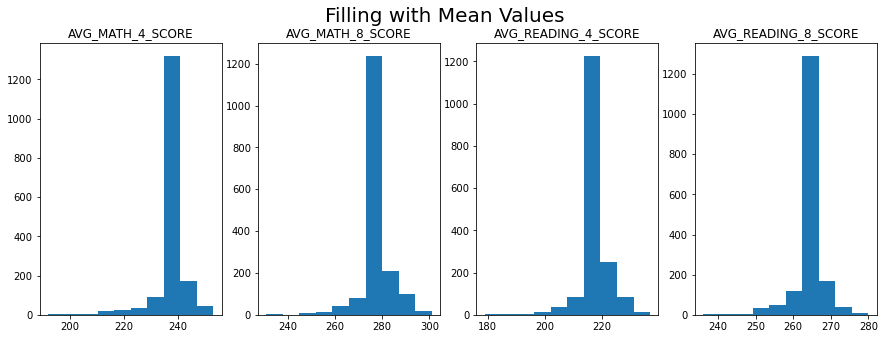

In [42]:
plt.figure(figsize=(15, 5))
plt.suptitle("Filling with Mean Values", fontsize=20)

plt.subplot(1, 4, 1)
plt.hist(states_1['AVG_MATH_4_SCORE'].fillna(states_1['AVG_MATH_4_SCORE'].mean()))
plt.title('AVG_MATH_4_SCORE')

plt.subplot(1, 4, 2)
plt.hist(states_1['AVG_MATH_8_SCORE'].fillna(states_1['AVG_MATH_8_SCORE'].mean()))
plt.title('AVG_MATH_8_SCORE')

plt.subplot(1, 4, 3)
plt.hist(states_1['AVG_READING_4_SCORE'].fillna(states_1['AVG_READING_4_SCORE'].mean()))
plt.title('AVG_READING_4_SCORE')

plt.subplot(1, 4, 4)
plt.hist(states_1['AVG_READING_8_SCORE'].fillna(states_1['AVG_READING_8_SCORE'].mean()))
plt.title('AVG_READING_8_SCORE')

plt.show()

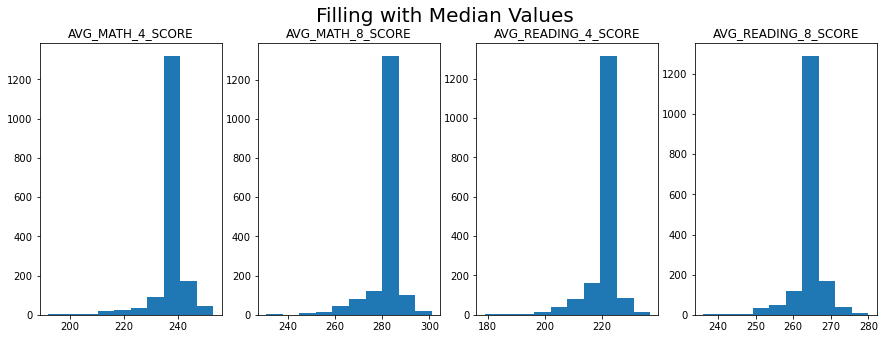

In [43]:
plt.figure(figsize=(15, 5))
plt.suptitle("Filling with Median Values", fontsize=20)

plt.subplot(1, 4, 1)
plt.hist(states_1['AVG_MATH_4_SCORE'].fillna(states_1['AVG_MATH_4_SCORE'].median()))
plt.title('AVG_MATH_4_SCORE')

plt.subplot(1, 4, 2)
plt.hist(states_1['AVG_MATH_8_SCORE'].fillna(states_1['AVG_MATH_8_SCORE'].median()))
plt.title('AVG_MATH_8_SCORE')

plt.subplot(1, 4, 3)
plt.hist(states_1['AVG_READING_4_SCORE'].fillna(states_1['AVG_READING_4_SCORE'].median()))
plt.title('AVG_READING_4_SCORE')

plt.subplot(1, 4, 4)
plt.hist(states_1['AVG_READING_8_SCORE'].fillna(states_1['AVG_READING_8_SCORE'].median()))
plt.title('AVG_READING_8_SCORE')

plt.show()

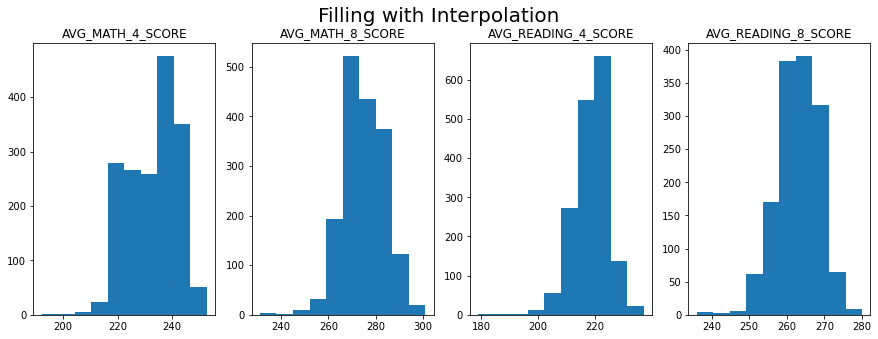

In [44]:
plt.figure(figsize=(15, 5))
plt.suptitle("Filling with Interpolation", fontsize=20)

plt.subplot(141)
plt.hist(states_1['AVG_MATH_4_SCORE'].interpolate())
plt.title('AVG_MATH_4_SCORE')

plt.subplot(142)
plt.hist(states_1['AVG_MATH_8_SCORE'].interpolate())
plt.title('AVG_MATH_8_SCORE')

plt.subplot(143)
plt.hist(states_1['AVG_READING_4_SCORE'].interpolate())
plt.title('AVG_READING_4_SCORE')

plt.subplot(144)
plt.hist(states_1['AVG_READING_8_SCORE'].interpolate())
plt.title('AVG_READING_8_SCORE')

plt.show()

<p> Filling missing values with interpolation method shows that values are more similar to the normal distribution.</p>